<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [30]:
##### Your Code Here #####
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import boston_housing
import numpy as np
import seaborn as sns

### Get Data

In [13]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# http://lib.stat.cmu.edu/datasets/boston

(x_train, y_train), (x_test, y_test) = boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)

In [14]:
# the 12th feature is pretty racist.  So we'll drop it.
x_train = np.delete(x_train, 11, axis=1)
x_test = np.delete(x_test, 11, axis=1)

In [15]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     ,  18.72   ])

In [16]:
x_train.shape

(404, 12)

In [17]:
y_train[0]

15.2

### Scale features

In [18]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_train

array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, ...,
        2.27533461e-01, 8.93617021e-01, 4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, ...,
        3.05927342e-01, 2.23404255e-01, 3.80794702e-02],
       [5.49837765e-02, 0.00000000e+00, 6.46627566e-01, ...,
        9.13957935e-01, 8.08510638e-01, 4.22185430e-02],
       ...,
       [3.18534767e-04, 3.50000000e-01, 2.05278592e-01, ...,
        2.21797323e-01, 4.57446809e-01, 1.68322296e-01],
       [2.40852297e-02, 0.00000000e+00, 7.00879765e-01, ...,
        4.11089866e-01, 2.23404255e-01, 3.87969095e-01],
       [9.07048543e-05, 6.00000000e-01, 9.05425220e-02, ...,
        1.47227533e-01, 3.19148936e-01, 7.31236203e-02]])

In [19]:
x_test = min_max_scaler.transform(x_test)

In [115]:
"""
forgot we're supposed to use the .add() method

model = Sequential([
    Flatten(),
    Dense(10, input_dim=12, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1)
])
"""
model = Sequential()

model.add(Flatten())
model.add(Dense(10, input_dim=12, activation="relu"))
model.add(Dense(1))

# We would use normal categorical_crossentropy if we one-hot encoded the target
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

results = model.fit(x=x_train, 
        y=y_train, 
        epochs=500, 
        validation_data=(x_test, y_test), 
        verbose = 0.5
        )

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [47]:
results.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [116]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         multiple                  0         
_________________________________________________________________
dense_23 (Dense)             multiple                  130       
_________________________________________________________________
dense_24 (Dense)             multiple                  11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

def graph_results(results, metric_list, title = "", dimensions = (6,4)):
    a4_dims = dimensions
    fig, ax = plt.subplots(figsize=a4_dims)
    plot_title="Plot of "
    
    for metric in metric_list:
        ax = sns.lineplot(x = [i for i in range(len(results.history[metric]))], y = results.history[metric])
        
        if title is graph_results.__defaults__[0]:
            plot_title += metric + ", "
        else:
            plot_title = title
    
    ax.set_title(plot_title)
    ax.set_xlabel('Epoch')
    ax.legend(metric_list)
    ax.set_ylabel("Score");

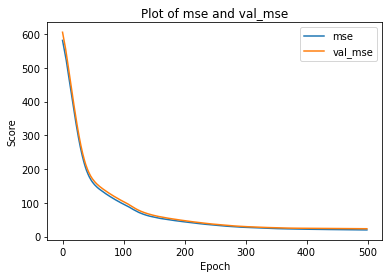

In [120]:
graph_results(results, ['mse', 'val_mse'], title = "Plot of mse and val_mse")

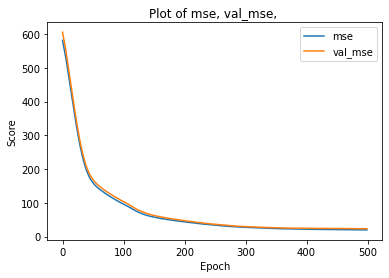

In [121]:
graph_results(results, ['mse', 'val_mse'])

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.